# Machine Learning: Assignment 3
## Decision Tree and Naive Bayes classification methods  (max. 10p)

In [1]:
# Write Your information in here

student_name = "Joonas Lahti, Kristian Pekkanen"
student_id = "AC6855, AD0462"

In this assignment, we will build a diabetes prediction model.

We try to predict the occurrence of diabetes using the following three ML classification methods:
1. Decision Tree
2. Gaussian Naive Bayes
3. kNN

**Dataset**:

You can download the data from the following link: [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

Description of the data: *The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*


## Assignment 3.1: Data preprocessing (1 p)

First, let's load the required Pima Indian Diabetes dataset into Pandas as CSV data.
You should use and name all the columns and drop the `label` column.

In [2]:
# TODO: preprocessing data
import pandas as pd

# Read data
df = pd.read_csv("diabetes.csv")
df.columns = ["Pregnancies",
              "Glucose",
              "BloodPressure",
              "SkinThickness",
              "Insulin",
              "BMI",
              "DiabetesPedigreeFunction",
              "Age",
              "Outcome"]

df = df.drop(df.columns[-1], axis=1)
print(df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


C:\Users\Kristian\AppData\Local\Temp\ipykernel_5188\3744186287.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Assignment 3.2: Decision Tree Classifier (3 p)

Try to predict the `label` value of the feature using other features with
1. Decision Tree,
2. Gaussian Naive Bayes and
3. kNN methods.

Split the data into training data and test data by split *80%/20%*.

Print the accuracy of the prediction, the confusion matrix and
how much different features affect the predicted variable according to the model (the importance of features).

Select the tree most important explanatory variables and print a scatter plot from them.

First implement the **Decision Tree classifier**.
* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [3]:
# TODO: Split the dataset (80/20%).
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetes.csv")
X = df.drop(df.columns[-1], axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

Build a machine learning model with Decision Tree and test the model.

In [4]:
# TODO: Build and test the Model
# TODO: Print accuracy of the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeClassifier(random_state=20)
model.fit(X_train_scaled, y_train)

y_predict = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predict)


print(f'Accuracy of Decision Tree: {round(accuracy*100, 1)} %.')

Accuracy of Decision Tree: 66.2 %.


Let's 
* show the confusion matrix and
* print the importance of features.

In [5]:
# TODO: the confusion matrix
from sklearn.metrics import confusion_matrix

# Show confusion matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[67, 34],
       [18, 35]], dtype=int64)

In [6]:
# TODO: print the importance of features
feature_importance = model.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f'{feature}: {importance}')

Pregnancies: 0.08123466149816667
Glucose: 0.32212091921799824
BloodPressure: 0.06849661980294117
SkinThickness: 0.00839276854390473
Insulin: 0.040499175781077
BMI: 0.22739560737357117
DiabetesPedigreeFunction: 0.12441526139418518
Age: 0.12744498638815582


Try to do some suitable visualization of the data.

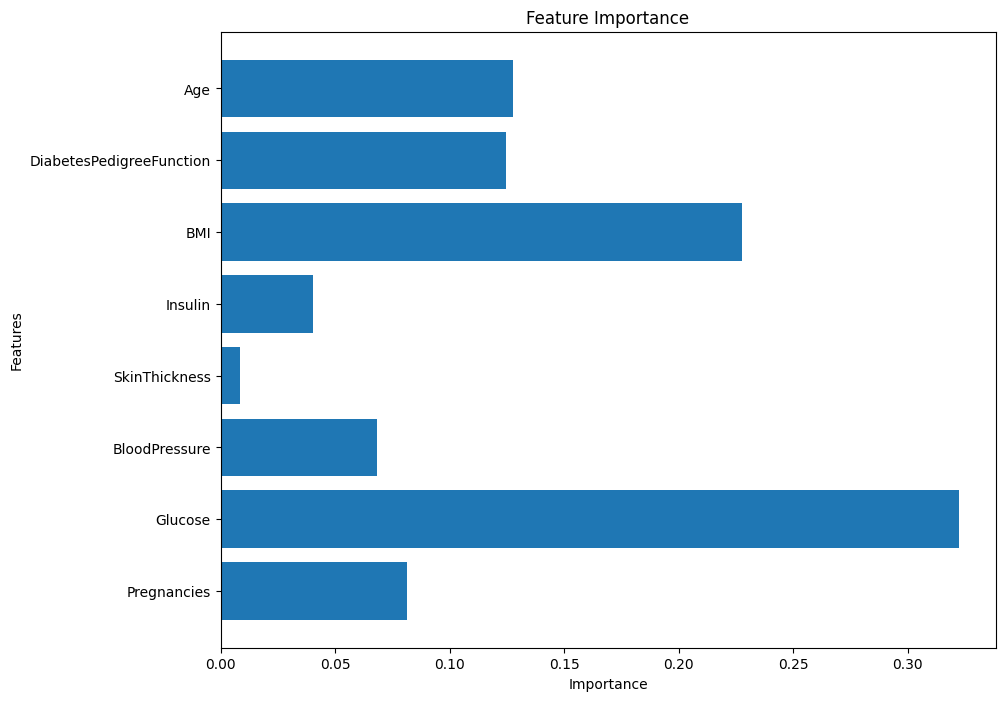

In [7]:
# TODO: Visualization
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(X.columns, feature_importance)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

## Assignment 3.3: Naive Gaussian classifier (2 p)
Second implement of a machine learning classification model is the **Naive Gaussian classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.



In [8]:
# TODO: Split the dataset (80/20%).
# TODO: Build and test the Model
# TODO: Print accuracy of the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred)


print(f'Accuracy of Naive Bayes: {round(acc*100, 1)} %.')

Accuracy of Naive Bayes: 71.4 %.


Now let's do Processing of results (naive Gaussian method) and show confusion matrix.

In [9]:
# TODO: the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# print confusion matrix
print(cm1)

[[82 19]
 [25 28]]


## Assignment 3.4: kNN (2 p)

The third implement of a machine learning classification model is the **kNN classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [10]:
# TODO: Split the dataset (80/20%).
# TODO: Build and test the Model
# TODO: Print accuracy of the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, knn_predict)

print(f'Accuracy of kNN: {round(acc*100, 1)} %.')

Accuracy of kNN: 65.6 %.


c:\Users\Kristian\source\repos\ml-assignments\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Processing of results (kNN method) and show confusion matrix.

In [11]:
# TODO: show confusion matrix
cm2 = confusion_matrix(y_test, knn_predict)
print(cm2)
# print confusion matrix

[[101   0]
 [ 53   0]]


## Assignment 3.5: Plotting the ROC curve (2p)

Also draw the ROC curves (with AUC) with three classification methods implemented:
1. decision tree
2. Gaussian
3. kNN

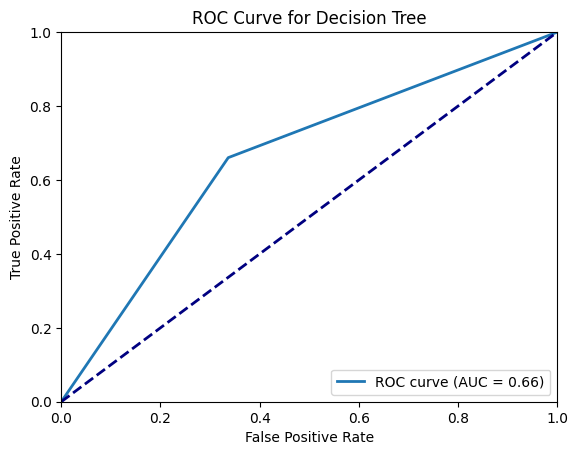

AUC for decision tree: 0.6618718475621147


In [12]:
# TODO: ROC for decision tree
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

print(f'AUC for decision tree: {roc_auc}')

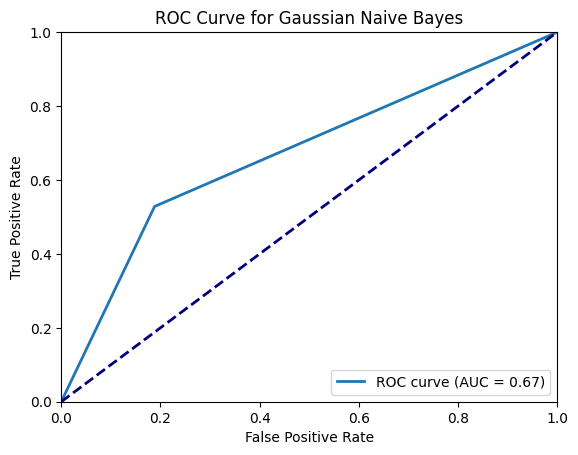

AUC for Gaussian Naive Bayes: 0.6700915374556324


In [13]:
# TODO: ROC for Naive Gaussian
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()

print(f'AUC for Gaussian Naive Bayes: {roc_auc}')

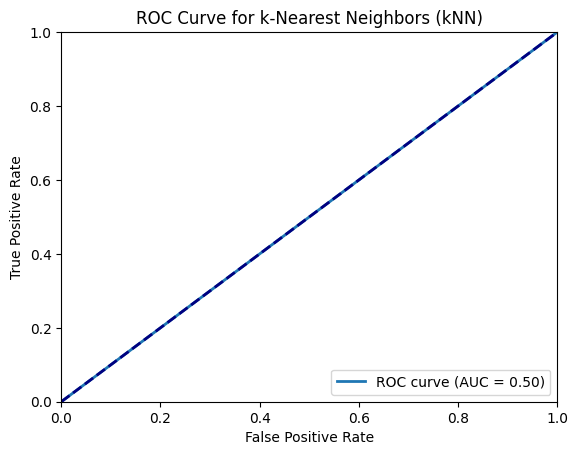

AUC for k-Nearest Neighbors (kNN): 0.5


In [14]:
# TODO: ROC for kNN

fpr, tpr, thresholds = roc_curve(y_test, knn_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for k-Nearest Neighbors (kNN)')
plt.legend(loc='lower right')
plt.show()

print(f'AUC for k-Nearest Neighbors (kNN): {roc_auc}')

### Conclusion
* TODO: Write comparison and conclusion of the results you got.<br>
<br>
comparison:<br>
it would seem, that the gaussian naive bayes and decision tree are the two most reliable ones, since the k-nearest neighbors got only 0.5 AUC.<br>
We do not think everything is ok with this code, because in the materials, there was like this:<br>
AUC 0.5: Random predictions (poor performance).<br>
AUC below 0.7: Moderate performance.<br>
AUC 0.7 - 0.8: Good performance.<br>
AUC above 0.8: Excellent performance. If AUC > 0.8: In this case, the model can distinguish positive and negative cases well, and has a strong ability to make correct predictions.<br>
<br>
if our machine learning is correctly done, its not that reliable.<br>
atleast we got it working, and we learned a lot while doing it.

## Extra Assignment: Other ML Methods

Can you find any other suitable ML classification methods which is better that these three with this dataset?
Of course, it needs some implementation to try out your solution and comparison of the results.

#### Random forest


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest: {round(accuracy * 100, 1)}%")

Accuracy of Random Forest: 74.0%
